In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

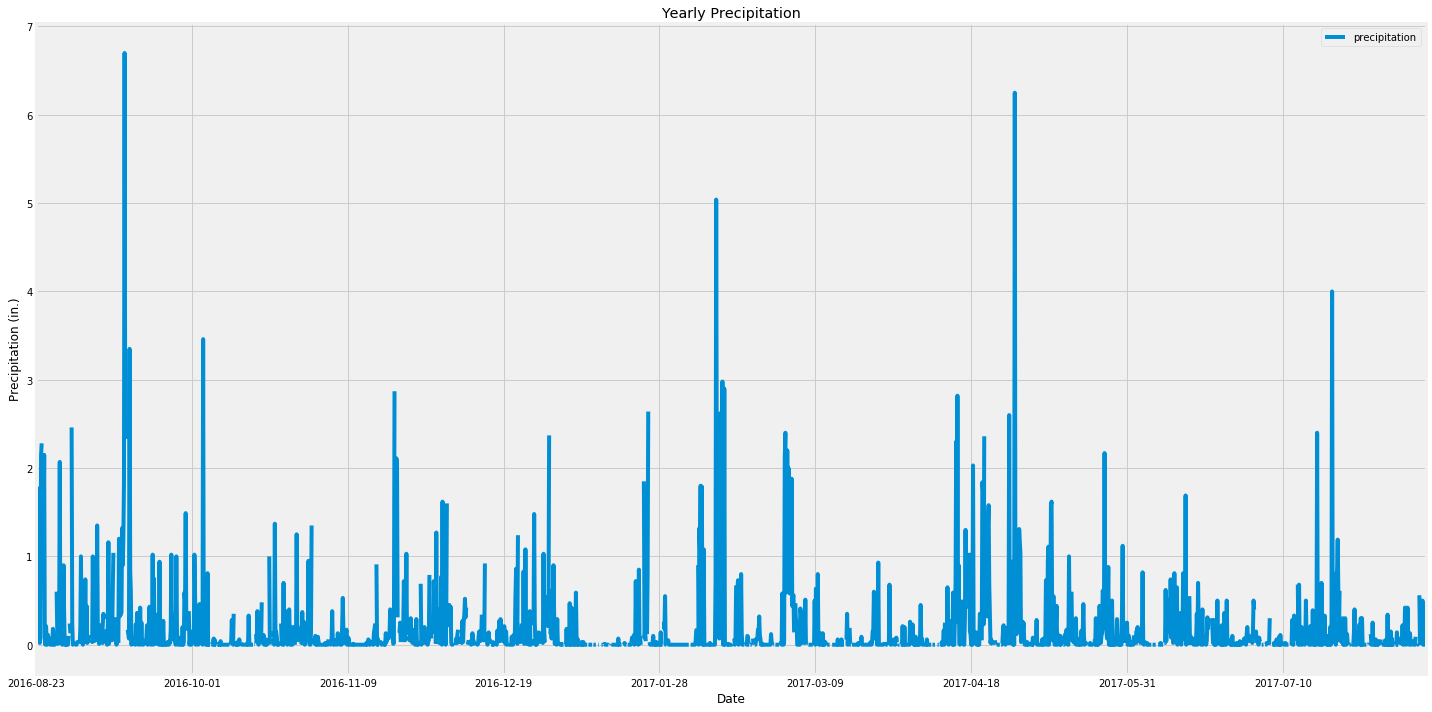

In [20]:
max_date = session.query(func.max(func.strftime("%Y-%m-%d", Measure.date))).limit(5).all()
max_date[0][0]

# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

rain_data = session.query(func.strftime("%Y-%m-%d", Measure.date), Measure.prcp).\
    filter(func.strftime("%Y-%m-%d", Measure.date) >= dt.date(2016, 8, 23)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_data, columns = ['date', 'precipitation'])
rain_df.set_index('date', inplace = True)

# Sort the dataframe by date
rain_df = rain_df.sort_values(by='date')
rain_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
rain_df.plot(ax = ax, x_compat = True)

ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in.)')
ax.set_title("Yearly Precipitation")

plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.id).distinct().count()
stations

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = (session.query(Measure.station, func.count(Measure.station))
                        .group_by(Measure.station)
                        .order_by(func.count(Measure.station).desc())
                        .all())
station_count

# Most active station are USC00519281, USC00519397, and USC00513117

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active = 'USC00519281'

low_temp = session.query(func.min(Measure.tobs)).filter(Measure.station == active).all()
low_temp

[(54.0)]

In [33]:
high_temp = session.query(func.max(Measure.tobs)).filter(Measure.station == active).all()
high_temp

[(85.0)]

In [34]:
avg_temp = session.query(func.avg(Measure.tobs)).filter(Measure.station == active).all()
avg_temp

[(71.66378066378067)]

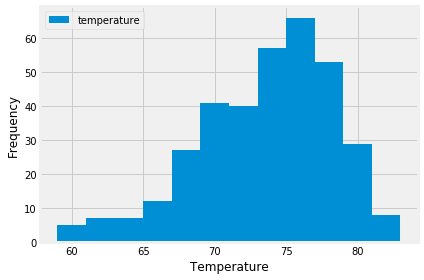

In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measure.date, Measure.tobs).filter(Measure.station == active).\
    filter(func.strftime("%Y-%m-%d", Measure.date) >= dt.date(2016, 8, 23)).all()

temp_obs_df = pd.DataFrame(temp_obs, columns = ['date', 'temperature'])

fig, ax = plt.subplots()
temp_obs_df.plot.hist(bins = 12, ax = ax)

ax.set_xlabel('Temperature')
ax.set_ylabel('Occurence')

plt.tight_layout()
plt.show()